<a href="https://colab.research.google.com/github/sujithgunturu/colabtogit/blob/main/derivative_t_j_minus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.special import betainc, beta, gamma
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def Tow(const):
  return gamma(const)

In [ ]:
def pmf(t_j):
  m = 100
  k =1.442
  term1 = Tow(m+k)/((math.factorial(m) * Tow(k)))
  term2 = (t_j/(t_j+k))**m
  term3 = (k/(t_j+k))**k
  return term1 * term2 * term3

In [ ]:
m_max = 100
k = 1.442
a = (m_max+k)/k

In [ ]:
def pmfdash(t_j):
  term1 = pmf(t_j)
  term2 = (k*(m_max-t_j))/(t_j *(t_j+k))
  return term1*term2
  

In [ ]:
def I(t_j):
  global m_max, k
  return betainc(k, m_max+1, k/(t_j+k))

In [ ]:
def Idash(t_j):
  global m_max, k
  z = k/(t_j+k)
  a = k
  b = m_max + 1
  term1 = (1-z)**(b-1)
  term2 = z**(a-1)
  chainterm = -k/((k+t_j)**2)
  return (term1 * term2* chainterm)/beta(a, b)

In [ ]:
def mainfunction(t_j):
  global a
  term1 = pmf(t_j)/I(t_j)
  term2 = (t_j * pmfdash(t_j))/ I(t_j)
  term3 = ((t_j) * (pmf(t_j) * Idash(t_j))) /I(t_j)**2
  return 1 - (a *(term1 + term2 - term3))
  

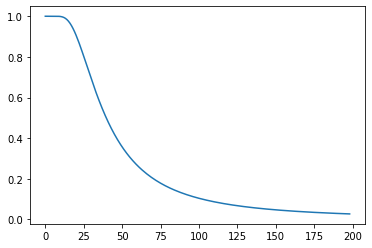

In [ ]:
arr = []
for i in range(1, 200):
  arr.append(mainfunction(i))
plt.plot(arr)


with scipy


In [ ]:
from scipy.misc import derivative

In [ ]:
def t_j_minusss(t_j):
  m_max = 100
  k =1.442
  a = (m_max + k)/k
  return t_j  - (t_j * ((a)*(pmf(t_j)/betainc(k, m_max+1, (k/(t_j+k))))))

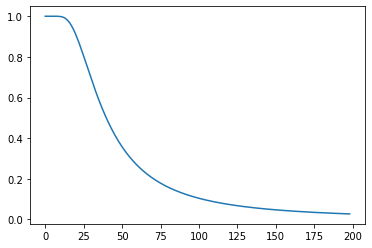

In [ ]:
checkarr = []
for i in range(1, 200):
  checkarr.append(derivative(t_j_minusss, i))
plt.plot(checkarr)

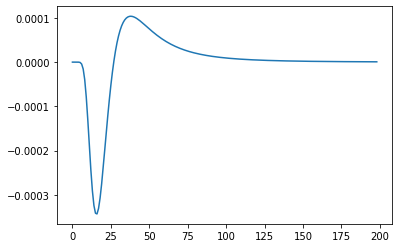

In [ ]:
plt.plot(np.array(checkarr) - np.array(arr))